# Lab 7: Statistical Inference for Means
## Name
---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import pandas as pd
import seaborn as sns

# Exercise 1

The census dataset is a random sample of 500 observations from the 2000 U.S. Census Data. Load the dataset and classify the different variables present.

---

Type your response here.

In [2]:
census = pd.read_csv("census.csv", na_values='NaN')

census

,Unnamed: 0,census_year,state_fips_code,total_family_income,age,sex,race_general,marital_status,total_personal_income
0,1,2000,Florida,14550.0,44,Male,Two major races,Married/spouse present,0.0
1,2,2000,Florida,22800.0,20,Female,White,Never married/single,13000.0
2,3,2000,Florida,0.0,20,Male,Black,Never married/single,20000.0
3,4,2000,Florida,23000.0,6,Female,White,Never married/single,NaN
4,5,2000,Florida,48000.0,55,Male,White,Married/spouse present,36000.0
...,...,...,...,...,...,...,...,...,...
495,496,2000,Virginia,8500.0,68,Female,White,Divorced,8500.0
496,497,2000,Virginia,55400.0,12,Male,White,Never married/single,NaN
497,498,2000,Virginia,15000.0,60,Male,Black,Widowed,15000.0
498,499,2000,Virginia,NaN,60,Male,Black,Married/spouse absent,48600.0


# Exercise 2

Construct a confidence interval to estimate the average personal income of people in the U.S. in 2000. Interpret your results.

---

Type your response here.

The observed average income is 29081.724489795917


C:\Users\rcampbelliii\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


The 95% confidence interval from bootstrapping is: [ 25443.54591836735 , 33065.557251908394 ]


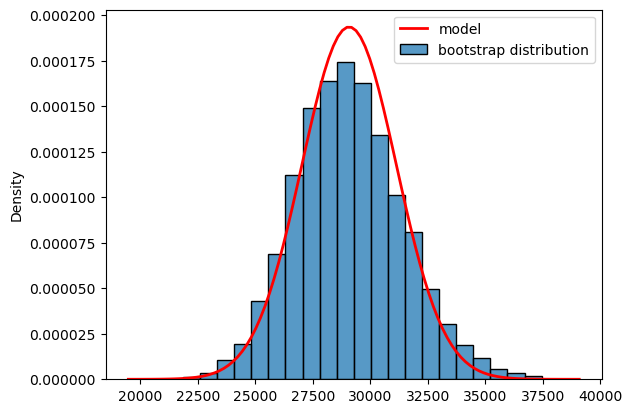

In [3]:
#Data not cleaned up
ave_income = census['total_personal_income'].mean()
print("The observed average income is", ave_income)

bootstrap_dist_income = []

for x in range(10000):
    simulated_income = pd.DataFrame().assign(total_personal_income=census['total_personal_income'].sample(frac=1, replace=True, ignore_index=True))
    bootstrap_dist_income.append(simulated_income['total_personal_income'].mean())

bootstrap_dist_income.sort()
ax = sns.histplot(data=bootstrap_dist_income, bins=24, label='bootstrap distribution', stat='density')

x0, x1 = ax.get_xlim()
x_pdf = np.linspace(x0, x1, 100)
y_pdf = st.t.pdf(x_pdf, df=len(census.index)-1, loc=ave_income, scale=census['total_personal_income'].std()/((len(census.index))**0.5))

ax.plot(x_pdf, y_pdf, 'r', lw=2, label='model')                                                   
ax.legend()

print("The 95% confidence interval from bootstrapping is: [", bootstrap_dist_income[int(0.05*len(bootstrap_dist_income))], ",", bootstrap_dist_income[int(0.95*len(bootstrap_dist_income))], "]")

The observed average income is 29081.724489795917


C:\Users\rcampbelliii\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


The 95% confidence interval from bootstrapping is: [ 25462.331632653062 , 33159.57142857143 ]


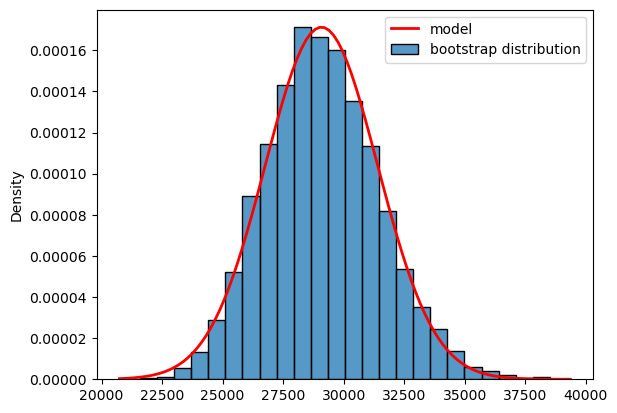

In [4]:
#Data cleaned up (hopefully)

census_pi = pd.DataFrame().assign(total_personal_income=census['total_personal_income'])
census_pi_clean = census_pi.dropna(ignore_index=True)

ave_income = census_pi_clean['total_personal_income'].mean()
print("The observed average income is", ave_income)

bootstrap_dist_income = []

for x in range(10000):
    simulated_income = pd.DataFrame().assign(total_personal_income=census_pi_clean['total_personal_income'].sample(frac=1, replace=True, ignore_index=True))
    bootstrap_dist_income.append(simulated_income['total_personal_income'].mean())

bootstrap_dist_income.sort()
ax = sns.histplot(data=bootstrap_dist_income, bins=24, label='bootstrap distribution', stat='density')

x0, x1 = ax.get_xlim()
x_pdf = np.linspace(x0, x1, 100)
y_pdf = st.t.pdf(x_pdf, df=len(census_pi_clean.index)-1, loc=ave_income, scale=census_pi_clean['total_personal_income'].std()/((len(census_pi_clean.index))**0.5))

ax.plot(x_pdf, y_pdf, 'r', lw=2, label='model')                                                   
ax.legend()

print("The 95% confidence interval from bootstrapping is: [", bootstrap_dist_income[int(0.05*len(bootstrap_dist_income))], ",", bootstrap_dist_income[int(0.95*len(bootstrap_dist_income))], "]")

# Exercise 3

Did men and women have different average incomes in 2000? Conduct a hypothesis test to find out. Be sure to include a confidence interval and interpret your results.

---

Type your response here.

The observed difference in average incomes is 22367.796829370043


C:\Users\rcampbelliii\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


The p-value for a two-tailed test from the simulated data is 0.0


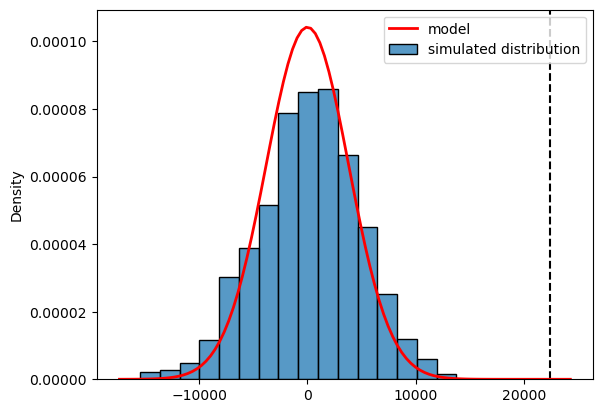

In [5]:
#Data not cleaned up

male_census = census[census.sex == 'Male']
female_census = census[census.sex == 'Female']

ave_male_income = male_census['total_personal_income'].mean()
ave_female_income = female_census['total_personal_income'].mean()
diff_ave = ave_male_income - ave_female_income
print("The observed difference in average incomes is", diff_ave)

sim_difference = []

for x in range(1000):
    sim_one_mix = pd.DataFrame().assign(total_personal_income=census['total_personal_income'], sex=census['sex'].sample(frac=1, ignore_index=True))
    sim_difference.append(sim_one_mix[sim_one_mix.sex == 'Male']['total_personal_income'].mean() - sim_one_mix[sim_one_mix.sex == 'Female']['total_personal_income'].mean())

ax = sns.histplot(data=sim_difference, bins=16, label="simulated distribution", stat='density')
ax.axvline(x = diff_ave, ymin = 0, ymax = 1, color = "black", linestyle = "dashed")

n_male = census['sex'].value_counts()[('Male')]
n_female = census['sex'].value_counts()[('Female')]

x0, x1 = ax.get_xlim()
x_pdf = np.linspace(x0, x1, 100)
y_pdf = st.t.pdf(x_pdf, df=min(n_male, n_female)-1, loc=0, scale=(male_census['total_personal_income'].std()**2 / n_male + female_census['total_personal_income'].std()**2 / n_female)**0.5)

ax.plot(x_pdf, y_pdf, 'red', lw=2, label='model')                                                   
ax.legend()

print("The p-value for a two-tailed test from the simulated data is", 2*len([i for i in sim_difference if i > diff_ave]) / len(sim_difference))

In [ ]:
#Data is cleaned up.

census_sex_pi = pd.DataFrame().assign(sex=census['sex'], total_personal_income=census['total_personal_income'])
census_clean = census_sex_pi.dropna(ignore_index=True)

male_census = census_clean[census.sex == 'Male']
female_census = census_clean[census.sex == 'Female']

ave_male_income = male_census['total_personal_income'].mean()
ave_female_income = female_census['total_personal_income'].mean()
diff_ave = ave_male_income - ave_female_income
print("The observed difference in average incomes is", diff_ave)

sim_difference = []

for x in range(1000):
    sim_one_mix = pd.DataFrame().assign(total_personal_income=census_clean['total_personal_income'], sex=census_clean['sex'].sample(frac=1, ignore_index=True))
    sim_difference.append(sim_one_mix[sim_one_mix.sex == 'Male']['total_personal_income'].mean() - sim_one_mix[sim_one_mix.sex == 'Female']['total_personal_income'].mean())

ax = sns.histplot(data=sim_difference, bins=20, label="simulated distribution", stat='density')
ax.axvline(x = diff_ave, ymin = 0, ymax = 1, color = "black", linestyle = "dashed")

n_male = census_clean['sex'].value_counts()[('Male')]
n_female = census_clean['sex'].value_counts()[('Female')]

x0, x1 = ax.get_xlim()
x_pdf = np.linspace(x0, x1, 100)
y_pdf = st.t.pdf(x_pdf, df=min(n_male, n_female)-1, loc=0, scale=(male_census['total_personal_income'].std()**2 / n_male + female_census['total_personal_income'].std()**2 / n_female)**0.5)

ax.plot(x_pdf, y_pdf, 'red', lw=2, label='model')                                                   
ax.legend()

print("The p-value for a two-tailed test from the simulated data is", 2*len([i for i in sim_difference if i > diff_ave]) / len(sim_difference))

The observed difference in average incomes is 5211.834999999999


C:\Users\rcampbelliii\AppData\Local\Temp\ipykernel_15936\747450890.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_census = census_clean[census.sex == 'Male']
C:\Users\rcampbelliii\AppData\Local\Temp\ipykernel_15936\747450890.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_census = census_clean[census.sex == 'Female']


In [ ]:
bootstrap_difference_dist = []

for x in range(10000):
    sim_male = pd.DataFrame().assign(total_personal_income=male_census['total_personal_income'].sample(frac=1, replace=True, ignore_index=True))
    sim_female = pd.DataFrame().assign(total_personal_income=female_census['total_personal_income'].sample(frac=1, replace=True, ignore_index=True))
    bootstrap_difference_dist.append(sim_male['total_personal_income'].mean() - sim_female['total_personal_income'].mean())

bootstrap_difference_dist.sort()
ax = sns.histplot(data=bootstrap_difference_dist, bins=24, label='bootstrap distribution', stat='density')
print("The 95% confidence interval from bootstrapping is: [", bootstrap_difference_dist[int(0.05*len(bootstrap_difference_dist))], ",", bootstrap_difference_dist[int(0.95*len(bootstrap_difference_dist))], "]")

x0, x1 = ax.get_xlim()
x_pdf = np.linspace(x0, x1, 100)
y_pdf = st.t.pdf(x_pdf, df=min(n_male, n_female)-1, loc=diff_ave, scale=(male_census['total_personal_income'].std()**2 / n_male + female_census['total_personal_income'].std()**2 / n_female)**0.5)

ax.plot(x_pdf, y_pdf, 'r', lw=2, label='model')                                                   
ax.legend()

# Exercise 4

Do the states have the same average family income? Conduct an ANOVA test to find out. Notice that the model does not match the simulation. Why might that be?

---

Type your response here.

In [ ]:
census_state_fi = pd.DataFrame().assign(state_fips_code=census['state_fips_code'], total_family_income=census['total_family_income'])
census_f = census_state_fi.dropna(ignore_index=True)

obs_f = st.f_oneway(*[census_f[census_f.state_fips_code == i]['total_family_income'] for i in census_f['state_fips_code'].unique()]).statistic
print("The observed F value for the test is ", obs_f)

simulated_f = []
for x in range(1000):
    sim_one_mix = pd.DataFrame().assign(total_family_income=census_f['total_family_income'], state_fips_code=census_f['state_fips_code'].sample(frac=1, ignore_index=True))
    simulated_f.append(st.f_oneway(*[sim_one_mix[sim_one_mix.state_fips_code == i]['total_family_income'] for i in sim_one_mix['state_fips_code'].unique()]).statistic)
    
ax = sns.histplot(data=simulated_f, label="simulated distribution", stat='density')
ax.axvline(x = obs_f, ymin = 0, ymax = 1, color = "black", linestyle = "dashed")

x0, x1 = ax.get_xlim()
x_pdf = np.linspace(x0, x1, 100)
y_pdf = st.f.pdf(x_pdf, dfn=len(census_f['state_fips_code'].unique()) - 1, dfd= len(census_f.index) - len(census_f['state_fips_code'].unique()))

ax.plot(x_pdf, y_pdf, 'r', lw=2, label='model')                                                   
ax.legend()

print("The p-value for an F test from the simulated data is", len([i for i in simulated_f if i > obs_f]) / len(simulated_f))